## Introduction 

<p class = "a">
    Dans ce rapport, je vais analyser les notes obtenus par les élèves de ma classe à deux niveaux, 5éme et 6éme années du primaire, de l'école centrale du secteur scolaire  Essakia Alhamra .
    Ces notes sont obtenus durant les trois premières semaines  consacrées aux évaluations diagnostiques, la saison 2018, 2019.
    Je vais utiliser les outils du langage R utilisé pour les statistiques. 
    Les étapees de mon analyses, seront expliquées et commentées à fur et à mesure de la progression de mon travail 
    
</p>

### 1- Charger les outils de travail.
Je vais commençer d'abord par charger les bibliothèques du langage R qui  me permettrons de mener à terme cette analyse.

In [17]:
library(dplyr)
library(tidyr)
library(corrplot)
#library(statsr)
library(ggrepel)
library(readxl)
library(RColorBrewer)
options(repr.plot.width = 7, repr.plot.height = 4)

### 2- Charger les donnée à partir d'un fichier Excel et les organiser selon le standard "tidy data" .


In [18]:
data_path = './Evaluation_Diagnostique.xlsx'
dt = tbl_df(read_xlsx(data_path, sheet = 2))
head(dt)

Prenom_Nom,Niveau,Genre,Français,Mathematiques,Arabe,Sciences
Mohamed Oubihi,6,garçon,6.81,9.64,7.18,6.56
Asmaa Bendara,6,fille,5.90,8.33,6.33,5.50
Ayoub bendara,5,garçon,4.29,4.40,4.92,5.50
Ilham Alhabib,5,fille,4.67,7.85,6.35,6.00
Hamza Ismail,5,garçon,2.67,5.00,5.30,5.00
Mohamed Amine Hafid,5,garçon,5.21,5.12,6.39,5.50


In [19]:
dt_orgnz <- dt %>% gather(4:7, key = Matiere, value = Note)

In [20]:
head(dt_orgnz)

Prenom_Nom,Niveau,Genre,Matiere,Note
Mohamed Oubihi,6,garçon,Français,6.81
Asmaa Bendara,6,fille,Français,5.90
Ayoub bendara,5,garçon,Français,4.29
Ilham Alhabib,5,fille,Français,4.67
Hamza Ismail,5,garçon,Français,2.67
Mohamed Amine Hafid,5,garçon,Français,5.21


In [21]:
tail(dt_orgnz)

Prenom_Nom,Niveau,Genre,Matiere,Note
Mohamed Amine Hafid,5,garçon,Sciences,5.5
Mohamed Bendara,5,garçon,Sciences,5.0
Lahoucine Outferdine,5,garçon,Sciences,6.0
Soulaimane Biramane,5,garçon,Sciences,5.0
Karima Atanam,5,fille,Sciences,7.5
Salma Oubihi,5,fille,Sciences,5.5


####  Sommaire des résultas
Les fonctions summary()  et str() permettent de donner un sommaire globale sur les données, leurs types , et les quartiles pour les données de type numériques:

<br> <b> Min.   : la note minimale.
<br> 1st Qu.: 25% des éléves ont obtenu une note inférieure ou égale à cette note.
<br> Median : 50% des éléves ont obtenu une note inférieure ou égale à cette notec
<br> Mean   : La moyenne generale de la classe 
<br> 3rd Qu.: 25% des éléves ont obtenu une note supérieure ou égale à cette note
<br> Max.   : la note maximale
</b>


In [22]:
summary(dt_orgnz)

  Prenom_Nom            Niveau         Genre             Matiere         
 Length:44          Min.   :5.000   Length:44          Length:44         
 Class :character   1st Qu.:5.000   Class :character   Class :character  
 Mode  :character   Median :5.000   Mode  :character   Mode  :character  
                    Mean   :5.182                                        
                    3rd Qu.:5.000                                        
                    Max.   :6.000                                        
      Note       
 Min.   : 2.500  
 1st Qu.: 4.987  
 Median : 5.500  
 Mean   : 5.734  
 3rd Qu.: 6.433  
 Max.   :10.000  

In [23]:
str(dt_orgnz)

Classes 'tbl_df', 'tbl' and 'data.frame':	44 obs. of  5 variables:
 $ Prenom_Nom: chr  "Mohamed Oubihi" "Asmaa Bendara" "Ayoub bendara" "Ilham Alhabib" ...
 $ Niveau    : num  6 6 5 5 5 5 5 5 5 5 ...
 $ Genre     : chr  "garçon" "fille" "garçon" "fille" ...
 $ Matiere   : chr  "Français" "Français" "Français" "Français" ...
 $ Note      : num  6.81 5.9 4.29 4.67 2.67 5.21 4 2.5 4.78 6.68 ...


### NB: Il faut bien noter que ces statistiques concernent toutes les notes sans distiction entre les matiéres, 
Alors je vais m'interesser aux moyennes générales obtenus par matière, pour l'ensemble des éleves vu que la 6éme ne compte que deux éléves.

In [24]:
dt_orgnz%>% group_by(Matiere) %>% summarize("Moyenne de la classe" = mean(Note))

Matiere,Moyenne de la classe
Arabe,5.996364
Français,4.777273
Mathematiques,6.430909
Sciences,5.732727


### à ce stade il faut se demander à quel point ses moyennes représentent le niveau de chaque classe,
pour cela calculons l'écart type de chaque matiére

In [25]:
dt_orgnz %>% group_by(Matiere) %>% summarize("L'écart type" = sd(Note))

Matiere,L'écart type
Arabe,1.0505263
Français,1.4053049
Mathematiques,2.3823033
Sciences,0.7601196


Les écarts types calculés pour les mathematiques, et le francais suggérent une dispersion assez importante des notes autour de la moyenne de la classe, ce qui peut déja nous renseigner sur le fait que les élèves sont repartis en groupes , alors que les notes des sciences indiquent que le niveau des éléves est presque le meme.

# 3- Grouper les éléves.
l'idée: Exploiter la correlation lineaire entre les donnés afin d'obtenir de constituer les groupes aussi scientifiquement que possible 
D'abord etablir la table de correlation 


In [35]:
cor_ = cor(dt %>% select(Français:Sciences))
cor_ = signif(cor_, digits = 4)
cor_

,Français,Mathematiques,Arabe,Sciences
Français,1.0000,0.7889,0.6907,0.5812
Mathematiques,0.7889,1.0000,0.7123,0.7383
Arabe,0.6907,0.7123,1.0000,0.8610
Sciences,0.5812,0.7383,0.8610,1.0000


### Representer cette table avec des couleurs sera beaucoup plus  facile à comprendre.

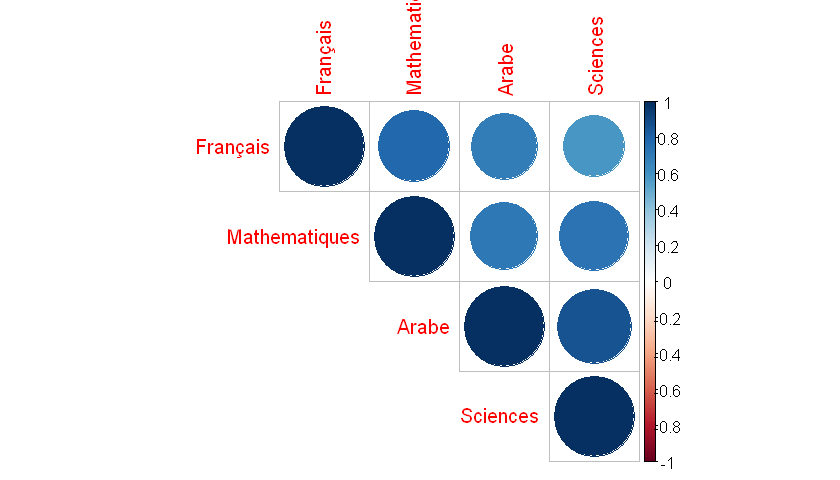

In [27]:
corrplot(cor_, type = 'upper')

Entre les notes de l'arabe et celle des sciences la correlation est presque 1, ce que s'explique par une relation lineaire croissante,et il en est de meme pour l'arabe et le français.
Les notes de ces trois sont "trés liés".
Alors l'idée  et de calculer la moyenne de ces trois matières pur chaque élève et de les representer contre celle des mathèmatiques

In [33]:
dt2 <- dt %>% mutate(moy_AFS = signif(rowMeans(subset(dt, select = c(Français, Arabe, Sciences))), digits = 3))

In [34]:
dt2

Prenom_Nom,Niveau,Genre,Français,Mathematiques,Arabe,Sciences,moy_AFS
Mohamed Oubihi,6,garçon,6.81,9.64,7.18,6.56,6.85
Asmaa Bendara,6,fille,5.90,8.33,6.33,5.50,5.91
Ayoub bendara,5,garçon,4.29,4.40,4.92,5.50,4.90
Ilham Alhabib,5,fille,4.67,7.85,6.35,6.00,5.67
Hamza Ismail,5,garçon,2.67,5.00,5.30,5.00,4.32
Mohamed Amine Hafid,5,garçon,5.21,5.12,6.39,5.50,5.70
Mohamed Bendara,5,garçon,4.00,3.02,5.63,5.00,4.88
Lahoucine Outferdine,5,garçon,2.50,4.40,5.60,6.00,4.70
Soulaimane Biramane,5,garçon,4.78,5.00,4.95,5.00,4.91
Karima Atanam,5,fille,6.68,10.00,8.29,7.50,7.49


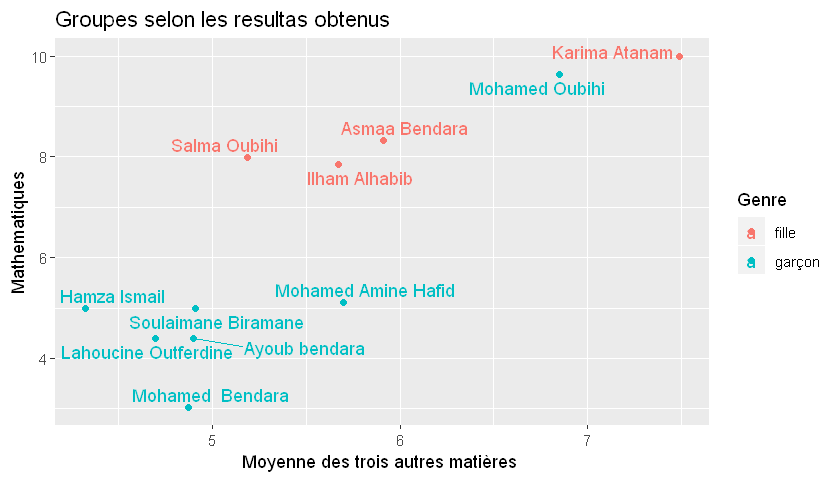

In [30]:
dt2 %>% ggplot(aes(moy_AFS, Mathematiques, col = Genre))+
geom_point()+
geom_text_repel(aes(label= Prenom_Nom))+
labs(title = "Groupes selon les resultas obtenus" , x = "Moyenne des trois autres matières ")
# geom_label_repel(label.r = "moyee")
#+facet_wrap(~Niveau)

Le graphe  indique qu'il y'a bien 2 groupes d'éléves:
<br>G1 : {Karima, Mohamed Oubihi, Asmaa, Salma, Ilham}
<br>G2 : {Hamza, Amine, Soulaimane, Lahoucine, Ayoub, Mohamed  Bendara}